In [31]:
import pandas as pd 
from sklearn.impute import SimpleImputer
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [37]:
def age_range(values):
    if values > 0 and values <= 17:
        return 0 
    elif values > 17 and values <= 30:
        return 1 
    elif values > 30 and values <= 45 :
        return 2 
    elif values > 45 and values <= 60 :
        return 3 
    elif values >  60 and values <= 90:
        return 4 
    else :
        return 5

In [46]:
# load features 
df_feature = pd.read_csv('../../data/feature_stg1.csv/part-00000-13c76568-33bb-4aaa-bb62-1bbeaf144bcb-c000.csv')
df_store = pd.read_csv('../../data/unique_store.csv/part-00000-d7453c53-4a48-4ff3-85f3-1e665ea60e07-c000.csv')
df_feature = df_feature.drop(['first_issue_date','first_redeem_date'],axis=1)
df_feature['age_group'] = df_feature['age'].apply(age_range)

# load products data 
df_product = pd.read_csv('../../data/data/products.csv')

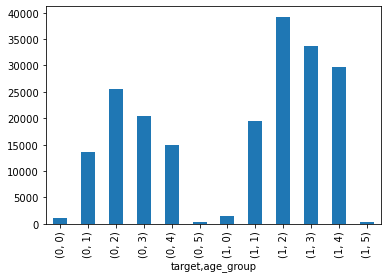

In [52]:
# df_feature['age_group'].value_counts()
df_feature.groupby(['target','age_group']).size().plot(kind='bar')

In [49]:
df_feature.head()

,client_id,treatment_flg,target,age,gender,m_1_rpr,m_11_rpr,m_12_rpr,m_2_rpr,m_3_rpr,m_1_eps,m_11_eps,m_12_eps,m_2_eps,m_3_eps,m_1_ps,m_11_ps,m_12_ps,m_2_ps,m_3_ps,m_1_rps,m_11_rps,m_12_rps,m_2_rps,m_3_rps,m_1_prd_qty_val,m_11_prd_qty_val,m_12_prd_qty_val,m_2_prd_qty_val,m_3_prd_qty_val,m_1_prd_pur,m_11_prd_pur,m_12_prd_pur,m_2_prd_pur,m_3_prd_pur,m_1_prd_pur_qty,m_11_prd_pur_qty,m_12_prd_pur_qty,m_2_prd_pur_qty,m_3_prd_pur_qty,m_1_prd_pur_sum,m_11_prd_pur_sum,m_12_prd_pur_sum,m_2_prd_pur_sum,m_3_prd_pur_sum,m_1_str_top_qty,m_11_str_top_qty,m_12_str_top_qty,m_2_str_top_qty,m_3_str_top_qty,m_1_str_top_pur,m_11_str_top_pur,m_12_str_top_pur,m_2_str_top_pur,m_3_str_top_pur,m_1_str_top_qty_val,m_11_str_top_qty_val,m_12_str_top_qty_val,m_2_str_top_qty_val,m_3_str_top_qty_val,m_1_str_top_pur_val,m_11_str_top_pur_val,m_12_str_top_pur_val,m_2_str_top_pur_val,m_3_str_top_pur_val,age_group
0,00f6cab0d9,0,1,48,U,17.6,NaN,26.5,11.1,13.2,0.0,NaN,0.0,0.0,0.0,2533.37,NaN,2844.54,1360.99,1732.33,0.0,NaN,0.0,0.0,0.0,4009f09b04,NaN,4009f09b04,4009f09b04,4009f09b04,4009f09b04,NaN,4009f09b04,4009f09b04,4009f09b04,5.0,NaN,4.0,3.0,3.0,2533.37,NaN,2844.54,1360.99,1601.13,6f953e34e7,NaN,6f953e34e7,6f953e34e7,6f953e34e7,6f953e34e7,NaN,6f953e34e7,6f953e34e7,6f953e34e7,83.0,NaN,83.0,83.0,83.0,1811.24,NaN,2844.54,1360.99,1732.33,3
1,010c5002de,1,1,27,M,3.2,3.0,8.6,5.4,3.5,-30.0,0.0,0.0,-30.0,0.0,970.41,307.56,1537.70,1163.03,728.48,-24.0,0.0,0.0,-6.0,0.0,b35e34907a,51bdfd2ddc,dd84e5153b,51dc63b6fd,95b0eb283e,b35e34907a,51bdfd2ddc,9d4159b0d0,51dc63b6fd,6b298e70f9,1.0,1.0,2.0,2.0,1.0,429.96,307.56,588.62,619.36,318.85,811c3845bd,811c3845bd,811c3845bd,811c3845bd,811c3845bd,811c3845bd,811c3845bd,811c3845bd,811c3845bd,811c3845bd,40.0,40.0,40.0,40.0,40.0,749.84,307.56,1537.70,764.03,728.48,1
2,018253c9e4,0,0,78,U,16.4,0.0,28.6,12.5,0.6,0.0,0.0,0.0,0.0,0.0,1651.00,309.00,3077.00,1706.00,223.00,0.0,-309.0,0.0,0.0,-100.0,dafacf9991,195815994c,d7c47dfa9b,5645789fdf,fc2811d84a,e7882af1a6,74d502f3c1,d7c47dfa9b,5645789fdf,fc2811d84a,1.0,1.0,2.0,2.0,1.0,972.00,179.00,2661.00,893.00,223.00,d19ef06705,d19ef06705,d19ef06705,d19ef06705,d8fc0e5abd,d8fc0e5abd,d19ef06705,d19ef06705,d19ef06705,d8fc0e5abd,39.0,39.0,39.0,39.0,28.0,972.00,309.00,2196.00,813.00,223.00,4
3,02429418df,0,0,23,M,NaN,NaN,13.4,15.9,8.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,1349.00,1876.70,931.07,NaN,NaN,0.0,0.0,0.0,NaN,NaN,4dcf79043e,4009f09b04,a67e072174,NaN,NaN,4dcf79043e,4009f09b04,4a29330c8d,NaN,NaN,1.0,2.0,1.0,NaN,NaN,1349.00,1841.70,582.07,NaN,NaN,d09acf8114,2fe93e36be,68c6d6a626,NaN,NaN,d09acf8114,2fe93e36be,68c6d6a626,NaN,NaN,10.0,21.0,10.0,NaN,NaN,1349.00,1337.70,582.07,1
4,026466cca4,1,1,26,U,14.1,NaN,17.3,5.0,NaN,0.0,NaN,-30.0,0.0,NaN,2046.90,NaN,2317.45,1029.14,NaN,0.0,NaN,-100.0,0.0,NaN,614c05e0f4,NaN,fec7fcf3a6,f05df41452,NaN,b44b9c16df,NaN,fb79e85e0e,f05df41452,NaN,2.0,NaN,2.0,1.0,NaN,832.97,NaN,1100.48,495.53,NaN,d93d341c66,NaN,d93d341c66,d93d341c66,NaN,d93d341c66,NaN,d93d341c66,d93d341c66,NaN,69.0,NaN,69.0,69.0,NaN,1529.20,NaN,2317.45,916.48,NaN,1


In [41]:
# split numeric and categorical columns 

categorical_columns = list(df_feature.select_dtypes(include=['object']).columns)
categorical_columns = categorical_columns[1:]

numeric_columns =  list(df_feature.select_dtypes(include=['float64']).columns)
# numeric_columns = numeric_columns

In [42]:
# fill null columns on numeric columns 
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df_feature[numeric_columns] = imp.fit_transform(df_feature[numeric_columns])

# fill null columns on numeric columns 
imp2 = SimpleImputer(strategy="most_frequent")
df_feature[categorical_columns] = imp2.fit_transform(df_feature[categorical_columns])

# fill null columns on numeric columns 
imp3 = SimpleImputer(strategy="most_frequent",missing_values='U')
df_feature['gender'] = imp3.fit_transform(df_feature['gender'].values.reshape(-1,1))

In [43]:
le_store = preprocessing.LabelEncoder()
le_prod = preprocessing.LabelEncoder()
le_gender = preprocessing.LabelEncoder()

le_prod.fit(df_product['product_id'])
le_store.fit(df_store['store_id'])
le_gender.fit(df_feature['gender'])

# product 
for col in ['m_1_prd_qty_val', 'm_11_prd_qty_val', 'm_12_prd_qty_val', 'm_2_prd_qty_val', 'm_3_prd_qty_val',
           'm_1_prd_pur','m_11_prd_pur','m_12_prd_pur','m_2_prd_pur','m_3_prd_pur']:
    df_feature[col] = le_prod.transform(df_feature[col])
    
# store 
for col in ['m_1_str_top_qty', 'm_11_str_top_qty', 'm_12_str_top_qty', 'm_2_str_top_qty', 'm_3_str_top_qty',
 'm_1_str_top_pur','m_11_str_top_pur','m_12_str_top_pur','m_2_str_top_pur','m_3_str_top_pur']:
    df_feature[col] = le_store.transform(df_feature[col])

df_feature['gender'] = le_gender.transform(df_feature['gender'])

In [44]:
df_feature[categorical_columns].isnull().sum()

gender              0
m_1_prd_qty_val     0
m_11_prd_qty_val    0
m_12_prd_qty_val    0
m_2_prd_qty_val     0
m_3_prd_qty_val     0
m_1_prd_pur         0
m_11_prd_pur        0
m_12_prd_pur        0
m_2_prd_pur         0
m_3_prd_pur         0
m_1_str_top_qty     0
m_11_str_top_qty    0
m_12_str_top_qty    0
m_2_str_top_qty     0
m_3_str_top_qty     0
m_1_str_top_pur     0
m_11_str_top_pur    0
m_12_str_top_pur    0
m_2_str_top_pur     0
m_3_str_top_pur     0
dtype: int64

In [7]:
pd.DataFrame(df_feature.isnull().sum())

,0
client_id,0
treatment_flg,0
target,0
age,0
gender,0
m_1_rpr,0
m_11_rpr,0
m_12_rpr,0
m_2_rpr,0
m_3_rpr,0


In [8]:
df_feature.groupby(['treatment_flg','target']).size()

treatment_flg  target
0              0         39695
               1         60363
1              0         36342
               1         63639
dtype: int64

In [9]:
df_feature['treatment_flg'].value_counts()

0    100058
1     99981
Name: treatment_flg, dtype: int64

In [10]:
df_feature['target'].value_counts()

1    124002
0     76037
Name: target, dtype: int64

In [11]:
df_feature.head()

,client_id,treatment_flg,target,age,gender,m_1_rpr,m_11_rpr,m_12_rpr,m_2_rpr,m_3_rpr,m_1_eps,m_11_eps,m_12_eps,m_2_eps,m_3_eps,m_1_ps,m_11_ps,m_12_ps,m_2_ps,m_3_ps,m_1_rps,m_11_rps,m_12_rps,m_2_rps,m_3_rps,m_1_prd_qty_val,m_11_prd_qty_val,m_12_prd_qty_val,m_2_prd_qty_val,m_3_prd_qty_val,m_1_prd_pur,m_11_prd_pur,m_12_prd_pur,m_2_prd_pur,m_3_prd_pur,m_1_prd_pur_qty,m_11_prd_pur_qty,m_12_prd_pur_qty,m_2_prd_pur_qty,m_3_prd_pur_qty,m_1_prd_pur_sum,m_11_prd_pur_sum,m_12_prd_pur_sum,m_2_prd_pur_sum,m_3_prd_pur_sum,m_1_str_top_qty,m_11_str_top_qty,m_12_str_top_qty,m_2_str_top_qty,m_3_str_top_qty,m_1_str_top_pur,m_11_str_top_pur,m_12_str_top_pur,m_2_str_top_pur,m_3_str_top_pur,m_1_str_top_qty_val,m_11_str_top_qty_val,m_12_str_top_qty_val,m_2_str_top_qty_val,m_3_str_top_qty_val,m_1_str_top_pur_val,m_11_str_top_pur_val,m_12_str_top_pur_val,m_2_str_top_pur_val,m_3_str_top_pur_val
0,00f6cab0d9,0,1,48,0,17.6,4.4,26.5,11.1,13.2,0.0,0.0,0.0,0.0,0.0,2533.37,698.865,2844.54,1360.99,1732.330,0.0,0.0,0.0,0.0,0.0,10810,10810,10810,10810,10810,10810,10810,10810,10810,10810,5.0,1.0,4.0,3.0,3.0,2533.370,537.63,2844.54,1360.99,1601.13,6022,12871,6022,6022,6022,6022,12871,6022,6022,6022,83.0,57.0,83.0,83.0,83.0,1811.240,618.27,2844.54,1360.99,1732.330
1,010c5002de,1,1,27,1,3.2,3.0,8.6,5.4,3.5,-30.0,0.0,0.0,-30.0,0.0,970.41,307.560,1537.70,1163.03,728.480,-24.0,0.0,0.0,-6.0,0.0,29983,13763,37180,13783,25083,29983,13763,26353,13783,17964,1.0,1.0,2.0,2.0,1.0,429.960,307.56,588.62,619.36,318.85,6960,6960,6960,6960,6960,6960,6960,6960,6960,6960,40.0,40.0,40.0,40.0,40.0,749.840,307.56,1537.70,764.03,728.480
2,018253c9e4,0,0,78,0,16.4,0.0,28.6,12.5,0.6,0.0,0.0,0.0,0.0,0.0,1651.00,309.000,3077.00,1706.00,223.000,0.0,-309.0,0.0,0.0,-100.0,36778,4261,36258,14501,42383,38892,19639,36258,14501,42383,1.0,1.0,2.0,2.0,1.0,972.000,179.00,2661.00,893.00,223.00,11440,11440,11440,11440,11809,11809,11440,11440,11440,11809,39.0,39.0,39.0,39.0,28.0,972.000,309.00,2196.00,813.00,223.000
3,02429418df,0,0,23,1,11.3,4.4,13.4,15.9,8.0,0.0,0.0,0.0,0.0,0.0,1618.00,698.865,1349.00,1876.70,931.070,0.0,0.0,0.0,0.0,0.0,10810,10810,13091,10810,27821,10810,10810,13091,10810,12454,2.0,1.0,1.0,2.0,1.0,1002.405,537.63,1349.00,1841.70,582.07,11336,12871,11379,2524,5653,11336,12871,11379,2524,5653,53.0,57.0,10.0,21.0,10.0,1285.905,618.27,1349.00,1337.70,582.070
4,026466cca4,1,1,26,0,14.1,4.4,17.3,5.0,8.4,0.0,0.0,-30.0,0.0,0.0,2046.90,698.865,2317.45,1029.14,1163.165,0.0,0.0,-100.0,0.0,0.0,16313,10810,42851,40393,10810,30166,10810,42286,40393,10810,2.0,1.0,2.0,1.0,2.0,832.970,537.63,1100.48,495.53,801.00,11822,12871,11822,11822,11336,11822,12871,11822,11822,11336,69.0,57.0,69.0,69.0,46.0,1529.200,618.27,2317.45,916.48,967.835


In [12]:
# split dataset 

# train and validation 
X_train, X_val, trmnt_train, trmnt_val, y_train, y_val = train_test_split( df_feature.drop(['client_id','treatment_flg', 'target'],axis=1), df_feature['treatment_flg'], df_feature['target'], 
    test_size=0.4,
    random_state=42
)

# test and validation 
X_val, X_test, trmnt_val, trmnt_test, y_val, y_test = train_test_split(X_val, trmnt_val , y_val,
    test_size=0.5,
    random_state=42
)


In [13]:
X_train.shape, X_val.shape, X_test.shape

((120023, 62), (40008, 62), (40008, 62))

#  conventional model 

In [14]:
%%time

#catboost 
# model_cat_conv = CatBoostClassifier(iterations=1500,task_type="GPU",cat_features=categorical_columns, verbose = 0, border_count = 150, l2_leaf_reg=5, depth =4,
#                            devices='0:1', learning_rate=0.03)
# model_cat_conv.fit(X_train,y_train, eval_set=(X_val, y_val))
model_cat_conv = CatBoostClassifier(learning_rate=0.03, verbose = 0)
# model_cat_conv.fit(X_train,y_train, eval_set=(X_val, y_val))

model_cat_conv.load_model('../../data/data/dft_catboost_feat_stg1')

Wall time: 45 ms


In [15]:
pred_val = model_cat_conv.predict(X_val)
pred_test = model_cat_conv.predict(X_test)
print('f1 score for validation set {}'.format(f1_score(y_val, pred_val, average='binary')))
print('f1 score for test set {}'.format(f1_score(y_test, pred_test, average='binary')))

f1 score for validation set 0.7774713087086509
f1 score for test set 0.7760672477723204


In [22]:
# del model_cat_conv

In [21]:
# # save model 
# model_cat_conv.save_model('../../data/data/dft_catboost_feat_stg1',
#            format="cbm",
#            export_parameters=None,
#            pool=None)

In [19]:
%%time
model_xgb_conv = XGBClassifier(use_label_encoder=False, eval_metric='error', learning_rate = 0.03)
# model_xgb_conv = model.fit(X_train, y_train)
model_xgb_conv.load_model('../../data/data/dft_xgb_feat_stg1.json')

Wall time: 37 ms


In [20]:
pred_val_xgb = model_xgb_conv.predict(X_val)
pred_test_xgb = model_xgb_conv.predict(X_test)
print('f1 score for validation set {}'.format(f1_score(y_val, pred_val_xgb, average='binary')))
print('f1 score for test set {}'.format(f1_score(y_test, pred_test_xgb, average='binary')))

f1 score for validation set 0.7758455952608447
f1 score for test set 0.7760195350804668


In [26]:
# model_xgb_conv.save_model("../../data/data/dft_xgb_feat_stg1.json")